In [1]:
import h5py
from sklearn.manifold import MDS
import numpy as np
from sklearn import datasets,manifold
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
import scikitplot as skplt
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

/Users/jzk/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#USPS
with h5py.File("/Users/jzk/Documents/M2/reducDim/usps.h5", 'r') as hf:
        train = hf.get('train')
        X_tr = train.get('data')[:]
        y_tr = train.get('target')[:]
        test = hf.get('test')
        X_te = test.get('data')[:]
        y_te = test.get('target')[:]

#PenDigits
digits = datasets.load_digits(n_class=10)
X_tr = digits.data
y_tr = digits.target
"""
###Mnist
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
arr=X_test
arr=arr.reshape(10000,784)
X_tr=arr
y_tr=y_test"""


'\n###Mnist\nfrom keras.datasets import mnist\n(X_train, y_train), (X_test, y_test) = mnist.load_data()\narr=X_test\narr=arr.reshape(10000,784)\nX_tr=arr\ny_tr=y_test'

Automatically created module for IPython interactive environment
standard: 0.86 sec
modified: 0.69 sec
LTSA: 0.53 sec
Isomap: 1.8 sec
MDS: 5.1 sec
t-SNE perp 10: 22 sec
t-SNE perp 30: 34 sec
t-SNE perp 50: 41 sec
PCA projection: 0.0079 sec
KPCA: 0.98 sec


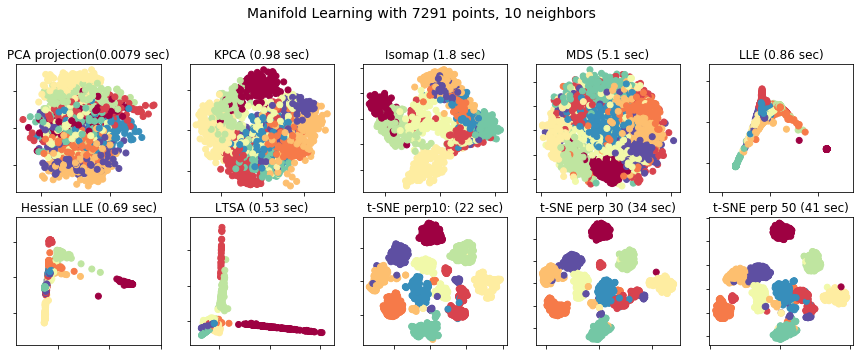

In [3]:
print(__doc__)

from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold, datasets

# Next line to silence pyflakes. This import is needed.
Axes3D
"""
n_points = 1000
X, color = datasets.samples_generator.make_s_curve(n_points, random_state=0)
n_neighbors = 10
n_components = 2
"""
n_points = 7291
X = X_tr
color = y_tr
n_neighbors = 10
n_components = 2


fig = plt.figure(figsize=(15, 8))
plt.suptitle("Manifold Learning with %i points, %i neighbors"
             % (n_points, n_neighbors), fontsize=14)


"""
ax = fig.add_subplot(351)
plt.scatter(y_tr[:], X_tr[:,1], c=color, cmap=plt.cm.Spectral)
plt.title("Color of each number")"""

methods = ['standard', 'modified']
labels = ['LLE', 'Hessian LLE']
for i, method in enumerate(methods):
    t0 = time()
    Y = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                        eigen_solver='auto',
                                        method=method).fit_transform(X)
    t1 = time()
    print("%s: %.2g sec" % (methods[i], t1 - t0))

    ax = fig.add_subplot(355 + i)
    plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    plt.title("%s (%.2g sec)" % (labels[i], t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')

t0 = time()
se = manifold.SpectralEmbedding(n_neighbors=n_neighbors, n_components=n_components)
Y = se.fit_transform(X)
t1 = time()
print("LTSA: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(357)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("LTSA (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')    
    
t0 = time()
Y = manifold.Isomap(n_neighbors, n_components).fit_transform(X)
t1 = time()
print("Isomap: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(353)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("Isomap (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')


t0 = time()
mds = manifold.MDS(n_components, max_iter=100, n_init=1)
Y = mds.fit_transform(X)
t1 = time()
print("MDS: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(354)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("MDS (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')



t0 = time()
tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0, perplexity=10)
Y = tsne.fit_transform(X)
t1 = time()
print("t-SNE perp 10: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(3, 5, 8)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("t-SNE perp10: (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

t0 = time()
tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0, perplexity = 30 )
Y = tsne.fit_transform(X)
t1 = time()
print("t-SNE perp 30: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(3, 5, 9)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("t-SNE perp 30 (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

t0 = time()
tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0, perplexity=50)
Y = tsne.fit_transform(X)
t1 = time()
print("t-SNE perp 50: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(3, 5, 10)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("t-SNE perp 50 (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')


t0 = time()
Y = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
t1 = time()
print("PCA projection: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(3,5,1)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("PCA projection(%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

t0 = time()
kpca = KernelPCA(kernel="linear", fit_inverse_transform=True, gamma=10)
Y = kpca.fit_transform(X)
t1 = time()
print("KPCA: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(3,5,2)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("KPCA (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')
plt.show()

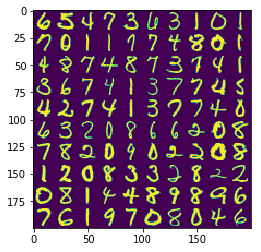

In [81]:
plt.imshow(img)

SpectralEmbedding: 34 sec


(-0.4298247851544522,
 0.4307788791558385,
 -0.3739114820889991,
 0.38271257182936386)

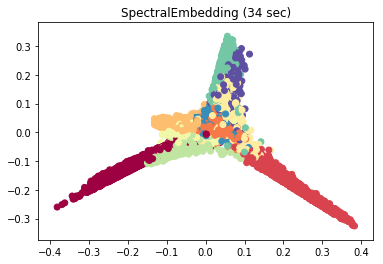

In [70]:
t0 = time()
se = manifold.SpectralEmbedding(n_neighbors=n_neighbors, n_components=n_components)

"""se = manifold.SpectralEmbedding(n_components=n_components,
                                n_neighbors=n_neighbors)"""
Y = se.fit_transform(X_tr)
t1 = time()
print("SpectralEmbedding: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(358)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("SpectralEmbedding (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

In [5]:
np.shape(color)

(1000,)

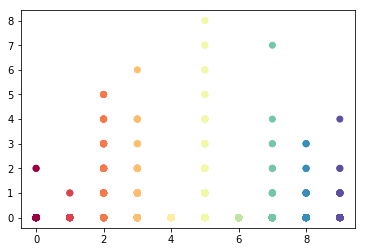

In [4]:
n_points = 7291
X = X_tr
color = y_tr
n_neighbors = 10
n_components = 2

Rdm Projection: 0.53 sec


/Users/jzk/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(-4930.953043790862, 6169.441638813037, -5716.145166374991, 6771.292549445242)

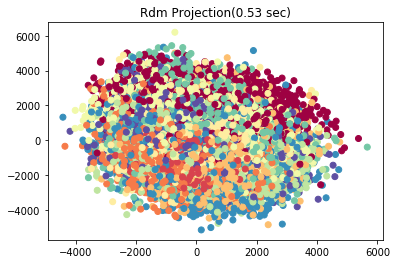

In [65]:
t0 = time()
rp = random_projection.SparseRandomProjection(n_components=2, random_state=42)
Y = rp.fit_transform(X_tr)
t1 = time()
print("Rdm Projection: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(3,5,12)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("Rdm Projection(%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

In [66]:
thresholds = [10,20,30,40,50,60,70,80,90,100]
output = pd.DataFrame([np.percentile(y_tr,x) for x in thresholds], index = thresholds, columns = ['deciles'])
output.iloc[::-1]
output

,deciles
10,1.0
20,1.2
30,3.0
40,3.0
50,4.0
60,5.0
70,6.0
80,7.0
90,8.4
100,9.0



n_points = 1000
X, color = datasets.samples_generator.make_s_curve(n_points, random_state=0)
n_neighbors = 10
n_components = 2

PCA projection: 0.025 sec
KPCA: 0.87 sec


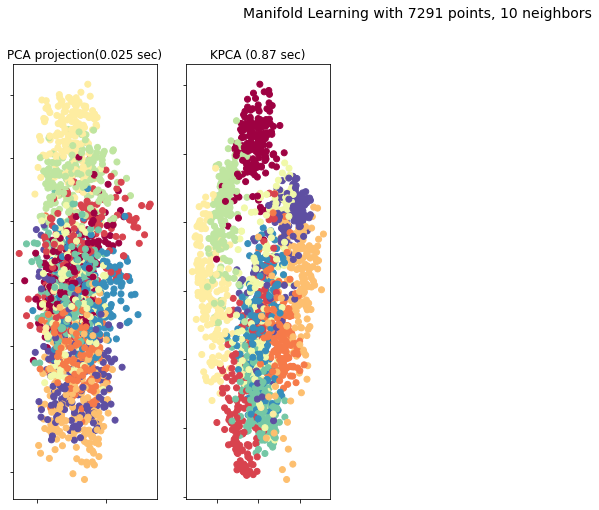

In [6]:

print(__doc__)

from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold, datasets

# Next line to silence pyflakes. This import is needed.
Axes3D
"""
n_points = 1000
X, color = datasets.samples_generator.make_s_curve(n_points, random_state=0)
n_neighbors = 10
n_components = 2
"""
n_points = 7291
X = X_tr
color = y_tr
n_neighbors = 10
n_components = 2


fig = plt.figure(figsize=(15, 8))
plt.suptitle("Manifold Learning with %i points, %i neighbors"
             % (n_points, n_neighbors), fontsize=14)

t0 = time()
Y = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
t1 = time()
print("PCA projection: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(1,5,1)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("PCA projection(%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

t0 = time()
kpca = KernelPCA(kernel="linear", fit_inverse_transform=True, gamma=10)
Y = kpca.fit_transform(X)
t1 = time()
print("KPCA: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(1,5,2)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("KPCA (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')
plt.show()

Isomap: 1.7 sec
MDS: 4.7 sec


(-51.74693412211148,
 54.078678204857255,
 -52.316005820210705,
 53.18896686038317)

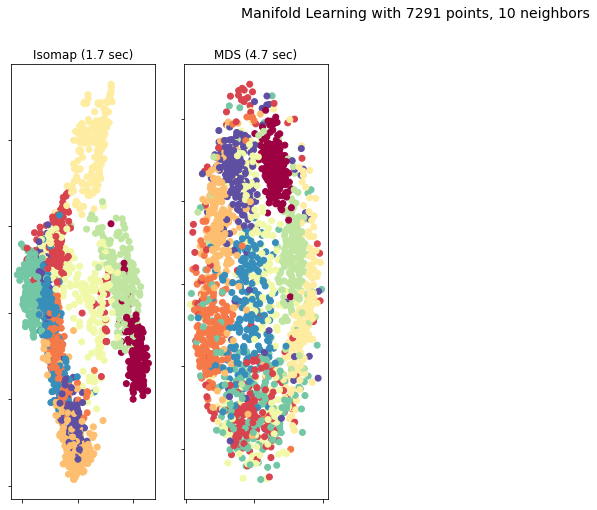

In [4]:
fig = plt.figure(figsize=(15, 8))
plt.suptitle("Manifold Learning with %i points, %i neighbors"
             % (n_points, n_neighbors), fontsize=14)
t0 = time()
Y = manifold.Isomap(n_neighbors, n_components).fit_transform(X)
t1 = time()
print("Isomap: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(1,5,1)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("Isomap (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')


t0 = time()
mds = manifold.MDS(n_components, max_iter=100, n_init=1)
Y = mds.fit_transform(X)
t1 = time()
print("MDS: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(1,5,2)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("MDS (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

standard: 1.1 sec
modified: 1.8 sec
LTSA: 0.43 sec


(-0.11863579126892862,
 0.45358412961663164,
 -0.11757413526194066,
 0.5659385236654937)

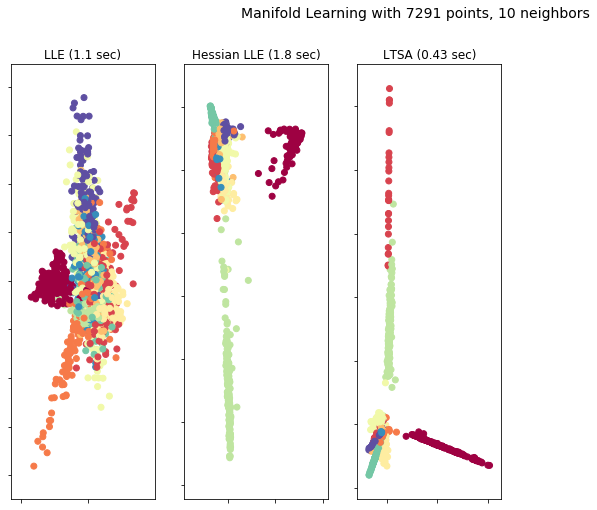

In [9]:
fig = plt.figure(figsize=(15, 8))
plt.suptitle("Manifold Learning with %i points, %i neighbors"
             % (n_points, n_neighbors), fontsize=14)

methods = ['standard', 'modified']
labels = ['LLE', 'Hessian LLE', 'Modified LLE']
for i, method in enumerate(methods):
    t0 = time()
    Y = manifold.LocallyLinearEmbedding(50, n_components,
                                        eigen_solver='auto',
                                        method=method).fit_transform(X)
    t1 = time()
    print("%s: %.2g sec" % (methods[i], t1 - t0))

    ax = fig.add_subplot(151 + i)
    plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    plt.title("%s (%.2g sec)" % (labels[i], t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')

t0 = time()
se = manifold.SpectralEmbedding(n_neighbors=n_neighbors, n_components=n_components)
Y = se.fit_transform(X)
t1 = time()
print("LTSA: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(153)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("LTSA (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')    

t-SNE perp 10: 64 sec
t-SNE perp 30: 1.4e+02 sec
t-SNE perp 50: 2.1e+02 sec


(-10.015504493269015,
 8.277607574018527,
 -9.594141015522265,
 10.017913827411911)

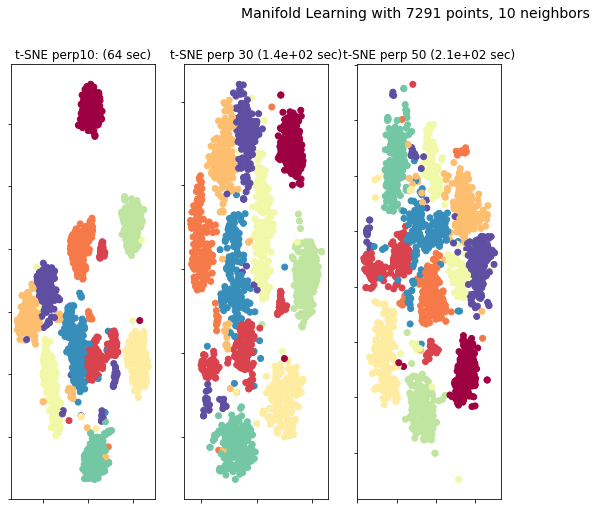

In [5]:
fig = plt.figure(figsize=(15, 8))
plt.suptitle("Manifold Learning with %i points, %i neighbors"
             % (n_points, n_neighbors), fontsize=14)

t0 = time()
tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0, perplexity=100)
Y = tsne.fit_transform(X)
t1 = time()
print("t-SNE perp 10: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(1, 5, 1)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("t-SNE perp10: (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

t0 = time()
tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0, perplexity = 300 )
Y = tsne.fit_transform(X)
t1 = time()
print("t-SNE perp 30: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(1, 5, 2)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("t-SNE perp 30 (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

t0 = time()
tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0, perplexity=500)
Y = tsne.fit_transform(X)
t1 = time()
print("t-SNE perp 50: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(1, 5, 3)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("t-SNE perp 50 (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')